In [1]:
from utils import *

In [2]:
from symmdiff import *

In [3]:
import pickle

In [4]:
from matplotlib_venn import venn3
import matplotlib.gridspec as gridspec
from scipy import stats
from IPython.display import display, Markdown

In [5]:
for p in ["cec_m1", "ser_m1", "cec_m2", "ser_m2"]:
    for i in ['dss', 'ab', 'dab']:
        print(p, i, len(differences[p][i]))

cec_m1 dss 0
cec_m1 ab 0
cec_m1 dab 6
ser_m1 dss 0
ser_m1 ab 0
ser_m1 dab 5
cec_m2 dss 0
cec_m2 ab 0
cec_m2 dab 9
ser_m2 dss 0
ser_m2 ab 0
ser_m2 dab 14


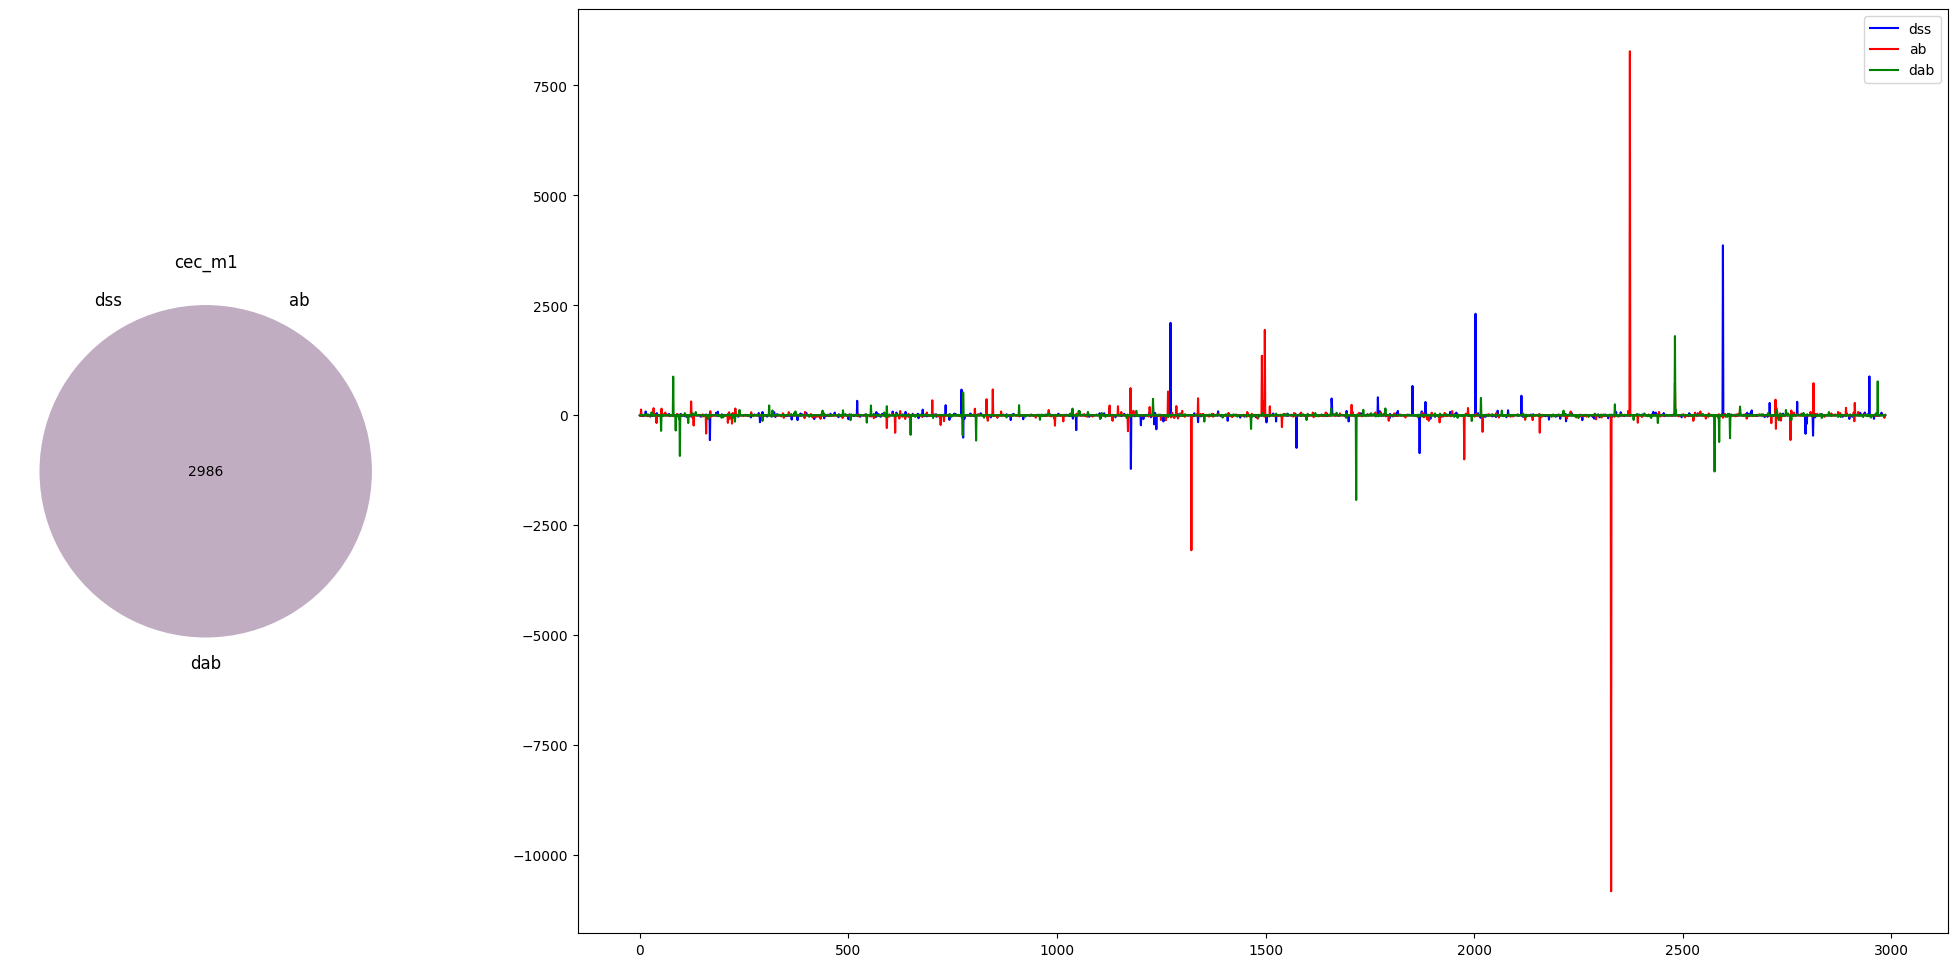

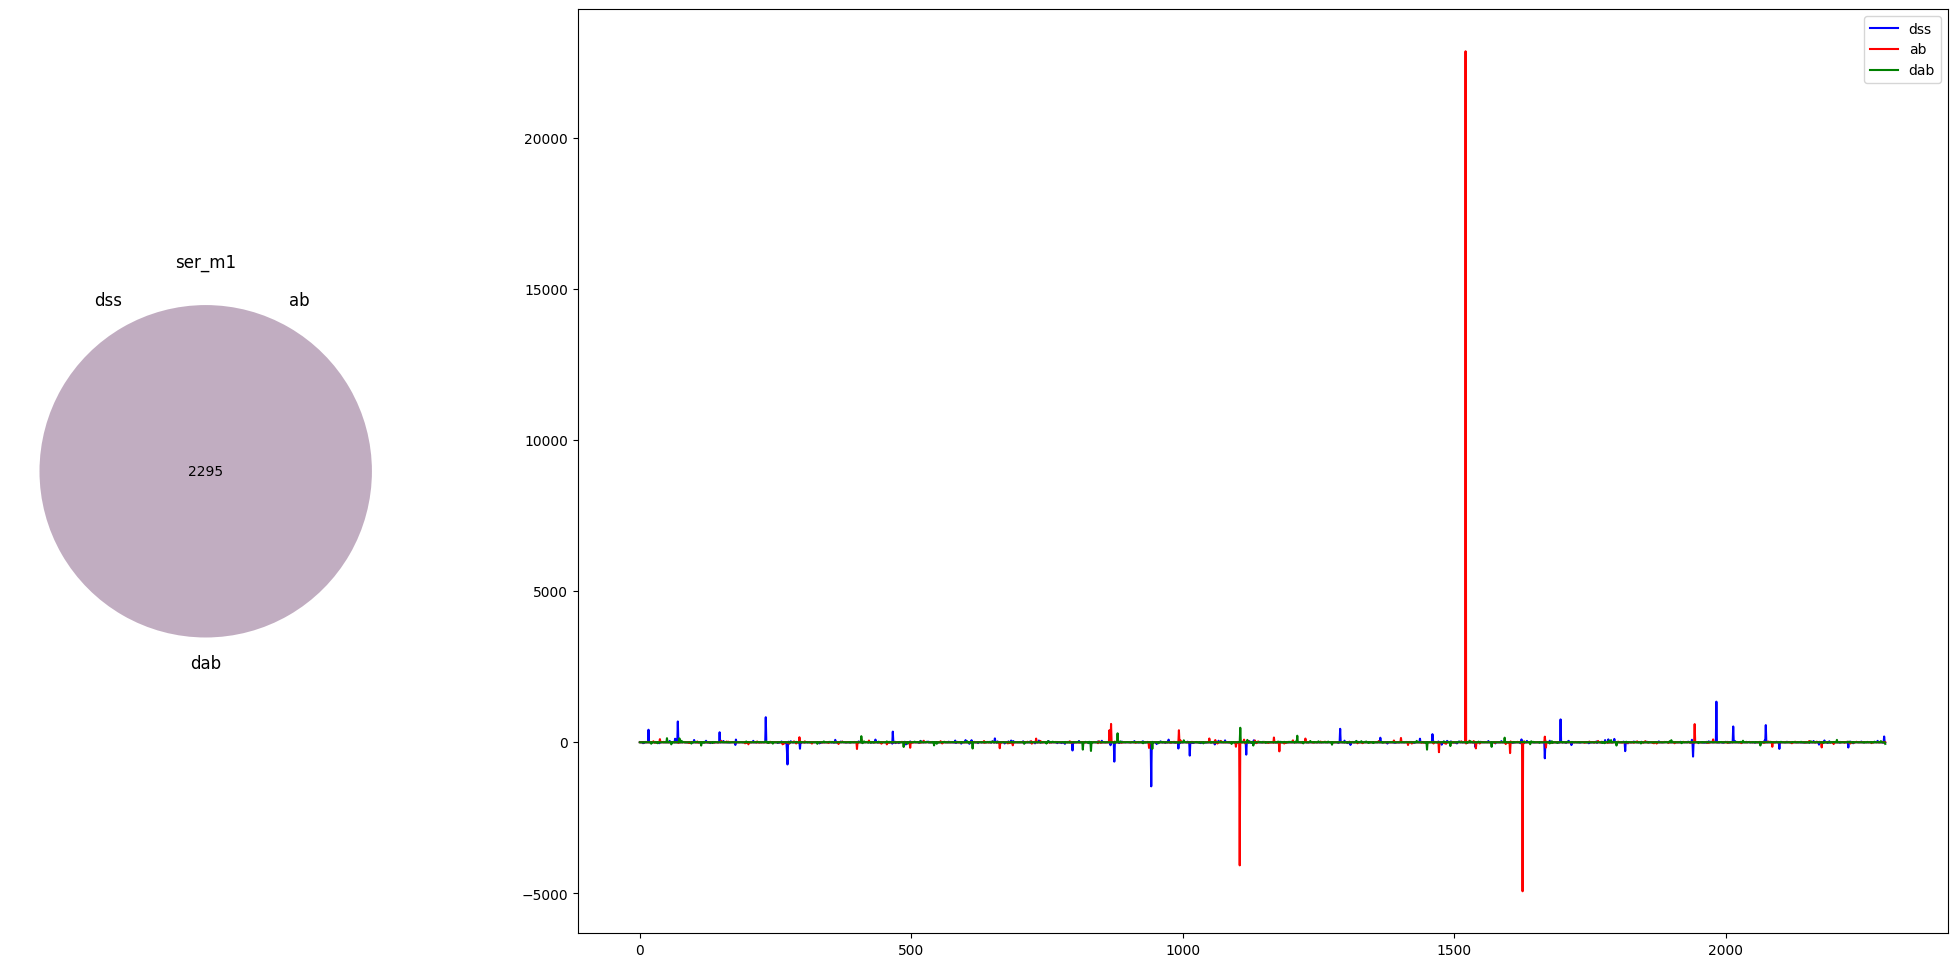

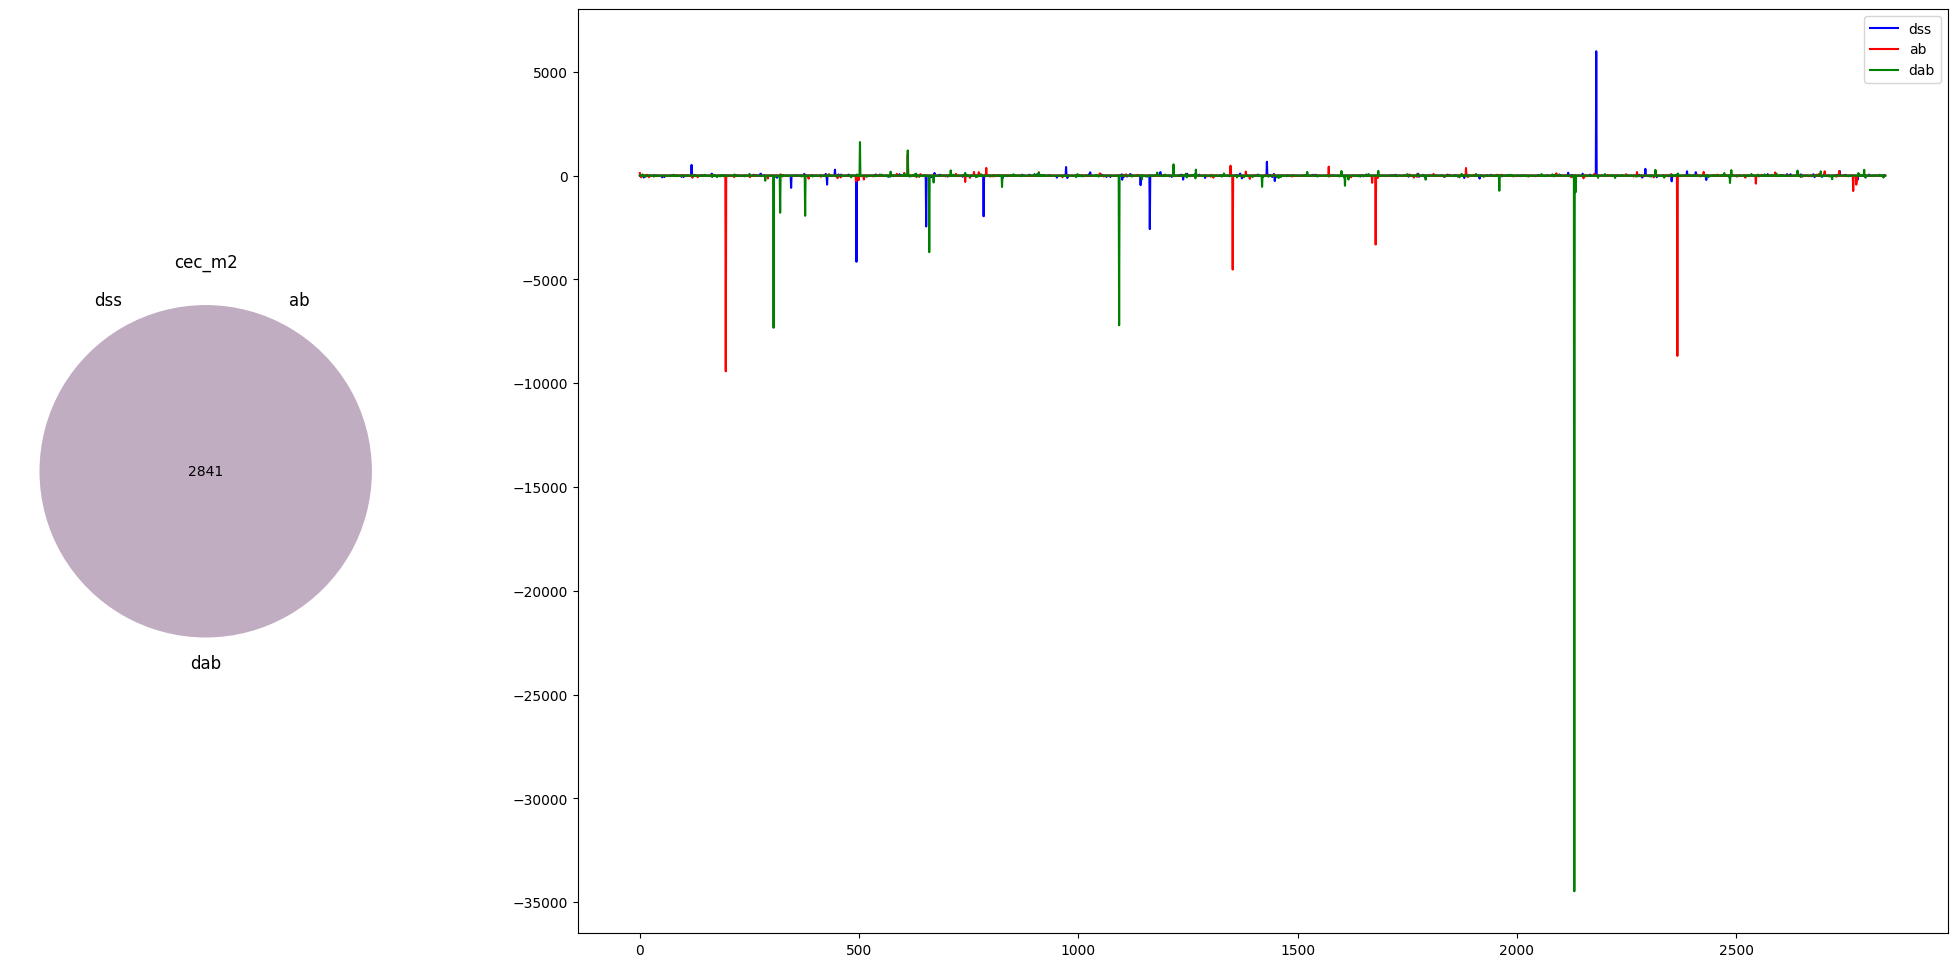

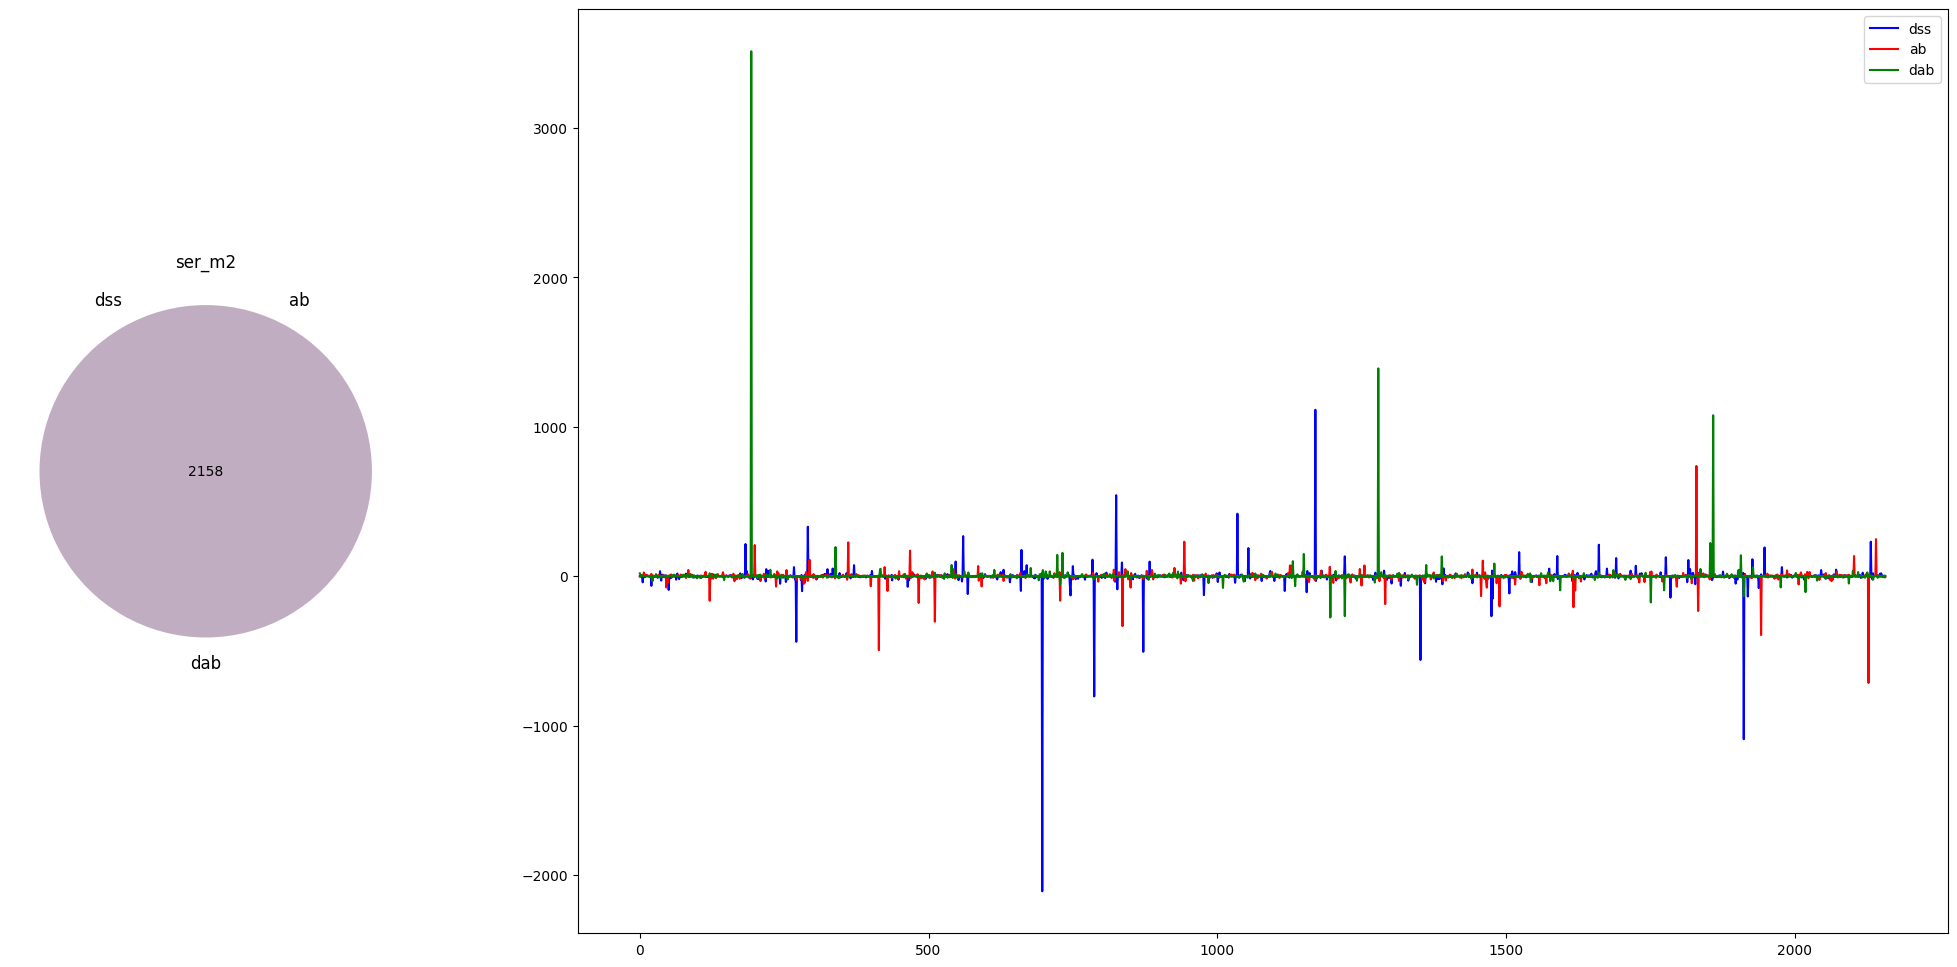

In [6]:
legends = {'dss' : 'blue', 'ab' : 'red', 'dab' : 'green'}
convs_all = {}
onlydicts = {}
for p in ["cec_m1", "ser_m1", "cec_m2", "ser_m2"]:
    sets_mb = {}
    hists = {}
    l = set()
    for k in differences[p].values():
        l = l | k
    # mdf = pd.read_hdf(f'generated/{struct_df_file[p]}', 'cvfiltered')
    mdf = cldf[p]
    # mdf = mdf[~(mdf['Metabolite Name'].isin(list(l)))]
    fig = pyplot.figure(figsize=(25, 12))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 3.5])
    convplot = pyplot.subplot(gs[1])
    vennplot = pyplot.subplot(gs[0])
    mconv = {}
    for j, i in enumerate(['dss', 'ab', 'dab']):
        e = Experiment2(i, 'h2o', mdf)
        sets_mb[i] = set(e.getmetabolites())

        conv = e.getconvexity()
        cmet = mdf['Metabolite Name'].to_numpy()
        cmet = cmet[~np.isnan(conv)]
        conv = conv[~np.isnan(conv)]
        convmet = np.column_stack([cmet, conv])
        # conv = conv[(abs(conv) < np.Inf)]     
        # conv = conv[(abs(conv) > 1)]
        ctdf = pd.DataFrame(convmet, columns=['Metabolite Name', 'convexity'])
        ctdf = ctdf.set_index(['Metabolite Name'])
        mconv[i] = ctdf
        # hists[i] = np.histogram(conv, bins=100)
        convplot.plot([i for i in range(len(conv))], conv, color=list(legends.values())[j])
        
    convplot.legend(legends)

    onlydict = {'dss' : sets_mb['dss'] - sets_mb['ab'] - sets_mb['dab'],  'ab' : sets_mb['ab'] - sets_mb['dss'] - sets_mb['dab'], 'dab' : sets_mb['dab'] - sets_mb['ab'] - sets_mb['dss']}

    layout = """
    dss: {dss}
    ab: {ab}
    dab: {dab}
    """
    convs_all[p] = mconv
    onlydicts[p] = onlydict
    
    # convplot.annotate(layout.format(**onlydict), xy=(0.05, 0.05), xycoords='axes fraction')
    venn3(list(sets_mb.values()), tuple(sets_mb.keys()), ax=vennplot)
    pyplot.title(p)
    pyplot.show()
    # pyplot.rcParams['figure.figsize'] = (25, 15)
    # for j, i in enumerate(['dss', 'ab', 'dab']):
    #     # print(i, hists[i][0], hists[i][1])
    #     # print(i, np.min(hists[i][0]))
    #     pyplot.subplot(1, 3, j + 1)
    #     pyplot.stairs(hists[i][0], hists[i][1])

In [7]:
for p in ["cec_m1", "ser_m1", "cec_m2", "ser_m2"]:
    mdf = pd.read_hdf(f'generated/{struct_df_file[p]}', 'cvfiltered')
    mdf = mdf[~(mdf['Metabolite Name'].isin(list(l)))]
    e = Experiment2('con', 'con', mdf)
    conv = e.getconvexity()
    cmet = mdf['Metabolite Name'].to_numpy()
    cmet = cmet[~np.isnan(conv)]
    conv = conv[~np.isnan(conv)]
    ctdf = pd.DataFrame(np.column_stack([cmet, conv]), columns=['Metabolite Name', 'convexity'])
    ctdf = ctdf.set_index(['Metabolite Name'])
    convs_all[p]['con'] = ctdf

In [8]:
for p in ["cec_m1", "ser_m1", "cec_m2", "ser_m2"]:
    mdf = pd.read_hdf(f'generated/{struct_df_file[p]}', 'cvfiltered')
    mdf = mdf[~(mdf['Metabolite Name'].isin(list(l)))]
    e = Experiment2('ab', 'dss', mdf)
    conv = e.getconvexity()
    cmet = mdf['Metabolite Name'].to_numpy()
    cmet = cmet[~np.isnan(conv)]
    conv = conv[~np.isnan(conv)]
    ctdf = pd.DataFrame(np.column_stack([cmet, conv]), columns=['Metabolite Name', 'convexity'])
    ctdf = ctdf.set_index(['Metabolite Name'])
    convs_all[p]['ab_dss'] = ctdf

In [9]:
for p in ["cec_m1", "ser_m1", "cec_m2", "ser_m2"]:
    mdf = pd.read_hdf(f'generated/{struct_df_file[p]}', 'cvfiltered')
    mdf = mdf[~(mdf['Metabolite Name'].isin(list(l)))]
    e = Experiment2('dss', 'ab', mdf)
    conv = e.getconvexity()
    cmet = mdf['Metabolite Name'].to_numpy()
    cmet = cmet[~np.isnan(conv)]
    conv = conv[~np.isnan(conv)]
    ctdf = pd.DataFrame(np.column_stack([cmet, conv]), columns=['Metabolite Name', 'convexity'])
    ctdf = ctdf.set_index(['Metabolite Name'])
    convs_all[p]['dss_ab'] = ctdf

In [10]:
for p in ["cec_m1", "ser_m1", "cec_m2", "ser_m2"]:
    for i in ['dss', 'ab', 'dab']:
        dists = convs_all[p][i]['convexity'] - convs_all[p]['con']['convexity']
        dists = np.array(dists.to_numpy(), dtype=float)
        dists = dists[abs(dists) < np.Inf]
        d = np.linalg.norm(dists, ord=6)/len(dists)
        print(f'for {p} distance betwwwen {i} and con {d}')
    print()

for cec_m1 distance betwwwen dss and con 1.6475359472079623
for cec_m1 distance betwwwen ab and con 3.7461246947126985
for cec_m1 distance betwwwen dab and con 1.5625989469271566

for ser_m1 distance betwwwen dss and con 21.221579333927753
for ser_m1 distance betwwwen ab and con 21.300506099396472
for ser_m1 distance betwwwen dab and con 21.25670127430876

for cec_m2 distance betwwwen dss and con 26.355762656935983
for cec_m2 distance betwwwen ab and con 26.35575403752162
for cec_m2 distance betwwwen dab and con 26.39380154932201

for ser_m2 distance betwwwen dss and con 18.085434538148988
for ser_m2 distance betwwwen ab and con 18.077850440681612
for ser_m2 distance betwwwen dab and con 18.084031209907913



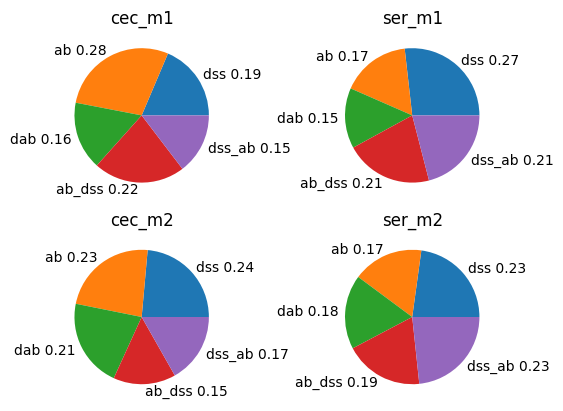

In [11]:
for j, p in enumerate(["cec_m1", "ser_m1", "cec_m2", "ser_m2"]):
    pc = []
    lb = {}
    for i in ['dss', 'ab', 'dab', 'ab_dss', 'dss_ab']:
        dists = convs_all[p][i]['convexity'] - convs_all[p]['con']['convexity']
        dists = np.array(dists, dtype=float)
        dists = dists[abs(dists) < np.Inf]
        z = stats.zscore(dists)
        dists = np.array(dists)
        dists = dists[np.where(abs(z) < 3)]
        d = np.linalg.norm(dists, ord=2)/len(dists)
        # print(f'for {p} distance betwwwen {i} and con {d}')
        pc.append(d)
        lb[i] = d
        # lb.append('{}  {:.2f}'.format(i, d))
    pyplot.subplot(2, 2, j + 1)
    sumd = np.sum(list(lb.values()))
    lb = {k : v/sumd for k, v in lb.items()}
    lb = ['{} {:.2f}'.format(k, v) for k, v in lb.items()]
    pyplot.pie(pc, labels=lb)
    pyplot.title(p)
    # pyplot.tight_layout()
    # print()
pyplot.show()

In [12]:
f = open('generated/convexities.html', 'a')
for p in ["cec_m1", "ser_m1", "cec_m2", "ser_m2"]:
    for i in ['dss', 'ab', 'dab']:
        distsup = abs(convs_all[p][i][convs_all[p][i]['convexity'] > 0]['convexity']) - abs(convs_all[p]['con']['convexity'])
        distsup = distsup.dropna()
        distsup = distsup[abs(distsup) < np.Inf]
        distuppos = distsup[distsup > 0]
        distupneg = distsup[distsup < 0]
        distuppos = distuppos.sort_values(ascending=False)
        distupneg = distupneg.sort_values()
        distuppos10 = distuppos[0:15]
        distupneg10 = distupneg[0:15]
        distuppos10df = pd.DataFrame(columns=['convexity'])
        distuppos10df['convexity'] = distuppos10
        distupneg10df = pd.DataFrame(columns=['convexity'])
        distupneg10df['convexity'] = distupneg10
        display(Markdown(f"### <span style='color:red'>{p} for {i}: up reg by treatment, end up upreg</span>"))
        display(distuppos10df)
        f.write(f"\n<span style='color:red'>{p} for {i}: up reg by treatment, end up upreg</span>")
        f.write(distuppos10df.to_html())
        display(Markdown(f"### <span style='color:blue'>{p} {i}: down reg by treatment, end up upreg</span>"))
        display(distupneg10df)
        f.write(f"\n<span style='color:blue'>{p} {i}: down reg by treatment, end up upreg</span>")
        f.write(distupneg10df.to_html())

        distsdown = abs(convs_all[p][i][convs_all[p][i]['convexity'] < 0]['convexity']) - abs(convs_all[p]['con']['convexity'])
        distsdown = distsdown.dropna()
        distsdown = distsdown[abs(distsdown) < np.Inf]
        distdownpos = distsdown[distsdown > 0]
        distdownneg = distsdown[distsdown < 0]
        distdownpos = distdownpos.sort_values(ascending=False)
        distdownneg = distdownneg.sort_values()
        distdownpos10 = distdownpos[0:15]
        distdownneg10 = distdownneg[0:15]
        distdownpos10df = pd.DataFrame(columns=['convexity'])
        distdownpos10df['convexity'] = distdownpos10
        distdownneg10df = pd.DataFrame(columns=['convexity'])
        distdownneg10df['convexity'] = distdownneg10
        display(Markdown(f"### <span style='color:green'>{p} for {i}: up reg, end up down reg</span>"))
        display(distdownpos10df)
        f.write(f"\n<span style='color:green'>{p} for {i}: up reg, end up down reg</span>")
        f.write(distdownpos10df.to_html())
        display(Markdown(f"### <span style='color:orange'>{p} {i}: down reg, end up down reg</span>"))
        display(distdownneg10df)
        f.write(f"\n<span style='color:orange'>{p} {i}: down reg, end up down reg</span>")
        f.write(distdownneg10df.to_html())
f.close()

### <span style='color:red'>cec_m1 for dss: up reg by treatment, end up upreg</span>

,convexity
Metabolite Name,
"w/o MS2:NCGC00180518-02!2-(3,4-dihydroxyphenyl)-5-hydroxy-7-[(2S,3R,4S,5S,6R)-3,4,5-trihydroxy-6-[[(2R,3R,4R,5R,6S)-3,4,5-trihydroxy-6-methyloxan-2-yl]oxymethyl]oxan-2-yl]oxy-2,3-dihydrochromen-4-one",3817.853742
"w/o MS2:(2E)-3-(3,4-Dimethoxyphenyl)-N-[2-(3,4-dimethoxyphenyl)ethyl]prop-2-enamide",2307.12066
w/o MS2:Prostaglandin F2.alpha. dimethylamine,2101.962431
w/o MS2:Phe-Thr-Lys,882.419592
"w/o MS2:N-(2-Phosphate-1R-methylethyl)-5Z,8Z,11Z,14Z-eicosatetraenamide",666.194185
w/o MS2:Bimatoprost diethylamide,582.308771
"w/o MS2:1,3-Dihydroxy-4,4,6a,9,12b-pentamethyl-1,3,4,4a,5,6,6a,9,10,12,12a,12b-dodecahydro-2H,11H-benzo[f]pyrano[2,3-b]chromen-11-one",443.727825
w/o MS2:N-(2-Adamantyl)-N'-butylthiourea,407.501795
w/o MS2:N-Acetyldihydrosphingosine,380.150403


### <span style='color:blue'>cec_m1 dss: down reg by treatment, end up upreg</span>

,convexity
Metabolite Name,
"w/o MS2:12-Hydroxy-4',4a,6a,7-tetramethyldocosahydrospiro[naphtho[2',1':4,5]indeno[2,1-b]furan-8,2'-pyran]-2-yl 6-O-hexopyranosylhexopyranoside",-4662.639117
w/o MS2:2-Cyclohexyl-N-(4-methoxyphenyl)acetamide,-1240.412044
w/o MS2:Thromboxane B2,-1126.532913
"w/o MS2:8,14-Epoxy-3-hydroxycarda-16,20(22)-dienolide triglycoside",-880.593295
w/o MS2:Betaine aldehyde cation,-541.190923
"w/o MS2:1H-Indole-5-sulfonamide, N-(3-chlorophenyl)-3-[[3,5-dimethyl-4-[(4-methyl-1-piperazinyl)carbonyl]-1H-pyrrol-2-yl]methylene]-2,3-dihydro-N-methyl-2-oxo-, (3Z)-",-503.217788
w/o MS2:Nodularin,-436.912775
w/o MS2:Lisinopril,-343.390897
w/o MS2:1-[(1-Methylpiperidin-2-yl)methyl]-3-(1-naphthoyl)indole,-330.396796


### <span style='color:green'>cec_m1 for dss: up reg, end up down reg</span>

,convexity
Metabolite Name,
w/o MS2:Pro-Pro-Lys,1217.385116
"w/o MS2:NCGC00180733-02!(E)-9-(1,3-benzodioxol-5-yl)-1-piperidin-1-ylnon-8-en-1-one",860.473494
w/o MS2:1-O-Octadecyl-2-O-methyl-sn-glyceryl-3-phosphorylcholine,739.622247
w/o MS2:4-Chloro-2-(trifluoromethyl)pyrimidine-5-carboxylic acid,558.419197
w/o MS2:Palmitic acid,497.318098
"w/o MS2:1,2-Dipalmitoylphosphatidylinositol-4,5-diphosphonate",463.762928
w/o MS2:3-[3-(Dimethylamino)propyl]-4-hydroxy-N-[4-(4-pyridyl)phenyl]benzamide,420.263794
"w/o MS2:6,7-Dibromo-4-methoxy-1H-indole",317.941229
w/o MS2:7-Methoxy-2-propylquinolin-4-ol,226.397948


### <span style='color:orange'>cec_m1 dss: down reg, end up down reg</span>

,convexity
Metabolite Name,
w/o MS2:Blood Group A Tetrasaccharide,-331.396077
w/o MS2:DL-Norvaline,-299.604677
w/o MS2:Coproporphyrin I,-263.014102
"w/o MS2:Benzo[h]-1,6-naphthyridin-2(1H)-one, 1-[4-[4-(1-oxopropyl)-1-piperazinyl]-3-(trifluoromethyl)phenyl]-9-(3-quinolinyl)-",-227.724386
"w/o MS2:Sodium 2,2'-methylene bis(4,6-di-tert-butylphenyl) phosphate",-213.643618
"w/o MS2:Tetradecanamide, N-[(1R,2R)-2-hydroxy-1-(hydroxymethyl)-2-(4-nitrophenyl)ethyl]-",-192.985513
w/o MS2:6-Ketoprostaglandin E1,-154.626132
w/o MS2:4-(Diphenylmethoxy)-1-[3-(1H-tetrazol-5-yl)propylpiperidine,-130.091423
"w/o MS2:Benzamide, 5-bromo-2-[(2-chloro-4-iodophenyl)amino]-N-(cyclopropylmethoxy)-3,4-difluoro-",-126.197175


### <span style='color:red'>cec_m1 for ab: up reg by treatment, end up upreg</span>

,convexity
Metabolite Name,
"w/o MS2:NCGC00381282-01![5-hydroxy-2-[4-hydroxy-2,5-bis(hydroxymethyl)-3-(2-methylpropanoyloxy)oxolan-2-yl]oxy-4-(2-methylpropanoyloxy)-6-(2-methylpropanoyloxymethyl)oxan-3-yl] decanoate",8274.107492
"w/o MS2:1-Naphthalenepentanoic acid, 5-carboxy-1,2,3,4,4a,7,8,8a-octahydro-7-hydroxy-.beta.,1,2,4a-tetramethyl-",1939.552315
w/o MS2:1-Lignoceroyl-2-hydroxy-sn-glycero-3-phosphocholine,1350.498455
"w/o MS2:2,4-Bis(1,1-dimethylethyl)phenol phosphate",732.908451
w/o MS2:.beta.-Nicotinamide adenine dinucleotide phosphate,728.457685
w/o MS2:O-Isobutyroylthiamine disulfide,613.187043
w/o MS2:Oxazepam glucuronide,586.489122
"w/o MS2:6-Nitro-2,3,4,9-tetrahydro-1H-carbazole",538.473334
w/o MS2:Ornibactin C6,384.215293


### <span style='color:blue'>cec_m1 ab: down reg by treatment, end up upreg</span>

,convexity
Metabolite Name,
"w/o MS2:12-Hydroxy-4',4a,6a,7-tetramethyldocosahydrospiro[naphtho[2',1':4,5]indeno[2,1-b]furan-8,2'-pyran]-2-yl 6-O-hexopyranosylhexopyranoside",-4661.424532
w/o MS2:2-Cyclohexyl-N-(4-methoxyphenyl)acetamide,-1240.906887
w/o MS2:Nodularin,-458.4404
"w/o MS2:1H-Indole-5-sulfonamide, N-(3-chlorophenyl)-3-[[3,5-dimethyl-4-[(4-methyl-1-piperazinyl)carbonyl]-1H-pyrrol-2-yl]methylene]-2,3-dihydro-N-methyl-2-oxo-, (3Z)-",-452.032069
w/o MS2:Lisinopril,-340.518338
w/o MS2:Blood Group A Tetrasaccharide,-298.359985
w/o MS2:Coproporphyrin I,-262.988787
w/o MS2:Icariin,-188.880028
w/o MS2:N-Cyclohexyl-N'-(tetrahydro-2-furanylmethyl)urea,-152.00616


### <span style='color:green'>cec_m1 for ab: up reg, end up down reg</span>

,convexity
Metabolite Name,
w/o MS2:2-Aminoethyl diphenylborinate,10816.740351
w/o MS2:Adefovir dipivoxil,3070.135625
"w/o MS2:NCGC00169957-03_C30H51N5O7_3-sec-Butyl-16-isobutyl-6-isopropyl-5,8,9-trimethyldodecahydropyrrolo[1,2-d][1,4,7,10,13,16]oxapentaazacyclononadecine-1,4,7,10,14,17(11H,16H)-hexone",1000.902975
"w/o MS2:2-(4-Hydroxy-7-methyl-5-oxo-2,3-dihydro-5H-furo[3,2-g]chromen-2-yl)propan-2-yl hexopyranoside",548.335707
w/o MS2:4-(2-Hydroxyethyl)piperazine-1-(2-hydroxypropanesulfonic acid),398.189938
w/o MS2:cis-5-Dodecenoic acid,395.441462
"w/o MS2:(1S,4R)-4-[[(2S,3aS,4S)-4-Hydroxy-2-methyl-1-oxo-3,3a-dihydro-2H-imidazo[1,2-a]indol-4-yl]methyl]-1-methyl-2,4-dihydro-1H-pyrazino[2,1-b]quinazoline-3,6-dione",377.011321
w/o MS2:Entecavir,362.856401
w/o MS2:Guanosine 5'-tetraphosphate,315.725171


### <span style='color:orange'>cec_m1 ab: down reg, end up down reg</span>

,convexity
Metabolite Name,
w/o MS2:Thromboxane B2,-1130.520033
"w/o MS2:8,14-Epoxy-3-hydroxycarda-16,20(22)-dienolide triglycoside",-879.290482
w/o MS2:DL-Norvaline,-636.098505
w/o MS2:Betaine aldehyde cation,-542.391921
w/o MS2:1-[(1-Methylpiperidin-2-yl)methyl]-3-(1-naphthoyl)indole,-330.903402
"w/o MS2:1-(1,2-Dihexanoylphosphatidyl)inositol-3,4-bisphosphate",-310.901081
"w/o MS2:Benzo[h]-1,6-naphthyridin-2(1H)-one, 1-[4-[4-(1-oxopropyl)-1-piperazinyl]-3-(trifluoromethyl)phenyl]-9-(3-quinolinyl)-",-226.122087
"w/o MS2:Sodium 2,2'-methylene bis(4,6-di-tert-butylphenyl) phosphate",-210.375619
"w/o MS2:Tetradecanamide, N-[(1R,2R)-2-hydroxy-1-(hydroxymethyl)-2-(4-nitrophenyl)ethyl]-",-192.37568


### <span style='color:red'>cec_m1 for dab: up reg by treatment, end up upreg</span>

,convexity
Metabolite Name,
"w/o MS2:2,4-Bis(1,1-dimethylethyl)phenol phosphate",1799.423895
w/o MS2:Ritonavir,876.265091
w/o MS2:CSCKDMTDKECLNFCHQDVIW/3,769.290036
w/o MS2:Palmitic acid,505.546074
w/o MS2:NCGC00169102-02!2-[5-[2-[2-[5-[2-[2-[5-[2-[2-[5-(2-hydroxybutyl)oxolan-2-yl]propanoyloxy]propyl]oxolan-2-yl]propanoyloxy]propyl]oxolan-2-yl]propanoyloxy]propyl]oxolan-2-yl]propanoic acid,393.844556
w/o MS2:6-O-((2Z)-3-(4-Hydroxy-3-methoxyphenyl)prop-2-enoyl)-.beta.-D-fructofuranosyl 6-O-acetyl-.alpha.-D-glucopyranoside,373.285293
w/o MS2:2-Cyano-N-{3-[(cyanoacetyl)amino]propyl}acetamide,234.294851
w/o MS2:Chaetoglobosin A,224.793853
"w/o MS2:4,6-Quinazolinediamine, N4-[2-(4-phenoxyphenyl)ethyl]-",214.737227


### <span style='color:blue'>cec_m1 dab: down reg by treatment, end up upreg</span>

,convexity
Metabolite Name,
w/o MS2:Thromboxane B2,-1121.262077
"w/o MS2:8,14-Epoxy-3-hydroxycarda-16,20(22)-dienolide triglycoside",-881.08414
w/o MS2:Betaine aldehyde cation,-542.659393
w/o MS2:Nodularin,-458.512548
w/o MS2:Lisinopril,-345.34884
w/o MS2:1-[(1-Methylpiperidin-2-yl)methyl]-3-(1-naphthoyl)indole,-329.955365
"w/o MS2:1-(1,2-Dihexanoylphosphatidyl)inositol-3,4-bisphosphate",-327.373473
w/o MS2:Coproporphyrin I,-263.000338
w/o MS2:cis-13-Docosenoic acid,-188.554048


### <span style='color:green'>cec_m1 for dab: up reg, end up down reg</span>

,convexity
Metabolite Name,
"w/o MS2:1H-Indazole-3-carboxamide, N-[(1S)-1-(aminocarbonyl)-2-methylpropyl]-1-(5-fluoropentyl)-",1899.84318
w/o MS2:2-((1-(4-Nitrobenzoyl)prolyl)amino)benzoic acid,1276.75515
w/o MS2:HSQGTFTSDYSKYLDSRRAQDFVQWLMNTKRNRNNIA/6,912.368736
w/o MS2:DKEAVYFAHLDIIW/-2,607.357698
w/o MS2:Phosphatidylcholine 22:0-18:2,573.660392
w/o MS2:Oxasulfuron,512.954592
w/o MS2:Palmitoyl sphingomyelin,458.608183
"w/o MS2:NCGC00384986-01!1-hydroxy-2-(hydroxymethyl)-3-[(2S,3R,4S,5S,6R)-3,4,5-trihydroxy-6-[[(2S,3R,4S,5R)-3,4,5-trihydroxyoxan-2-yl]oxymethyl]oxan-2-yl]oxyanthracene-9,10-dione",438.683689
w/o MS2:Rimcazole,345.095931


### <span style='color:orange'>cec_m1 dab: down reg, end up down reg</span>

,convexity
Metabolite Name,
"w/o MS2:12-Hydroxy-4',4a,6a,7-tetramethyldocosahydrospiro[naphtho[2',1':4,5]indeno[2,1-b]furan-8,2'-pyran]-2-yl 6-O-hexopyranosylhexopyranoside",-4655.737581
w/o MS2:2-Cyclohexyl-N-(4-methoxyphenyl)acetamide,-1239.211384
w/o MS2:DL-Norvaline,-636.0301
"w/o MS2:1H-Indole-5-sulfonamide, N-(3-chlorophenyl)-3-[[3,5-dimethyl-4-[(4-methyl-1-piperazinyl)carbonyl]-1H-pyrrol-2-yl]methylene]-2,3-dihydro-N-methyl-2-oxo-, (3Z)-",-494.435593
w/o MS2:Blood Group A Tetrasaccharide,-319.699655
"w/o MS2:Benzo[h]-1,6-naphthyridin-2(1H)-one, 1-[4-[4-(1-oxopropyl)-1-piperazinyl]-3-(trifluoromethyl)phenyl]-9-(3-quinolinyl)-",-228.582233
"w/o MS2:Sodium 2,2'-methylene bis(4,6-di-tert-butylphenyl) phosphate",-212.924083
w/o MS2:Icariin,-180.690711
w/o MS2:N-Cyclohexyl-N'-(tetrahydro-2-furanylmethyl)urea,-157.634468


### <span style='color:red'>ser_m1 for dss: up reg by treatment, end up upreg</span>

,convexity
Metabolite Name,
w/o MS2:Calpain Inhibitor II,1335.621483
"w/o MS2:Phenol, 5-(1,1-dimethylheptyl)-2-[(1R,2R,5R)-5-hydroxy-2-(3-hydroxypropyl)cyclohexyl]-, rel-(+)-",825.829974
"w/o MS2:(2,4,5-Trichlorophenoxy)acetic acid",751.033579
"w/o MS2:7-Benzyl-11,14-dimethyl-16-(2-methylpropyl)-10,13-di(propan-2-yl)-17-oxa-1,5,8,11,14-pentazabicyclo[17.3.0]docosane-2,6,9,12,15,18-hexone",686.437431
w/o MS2:1-(2-Chloroacetyl)-3-isopropylurea,565.549933
w/o MS2:beta-carotene,443.39516
w/o MS2:Methyl 2-[[4-hydroxy-3-(2-methylbut-3-en-2-yl)-5-(3-methylbut-2-enyl)phenyl]methyl]-3-(4-hydroxyphenyl)-4-methoxy-5-oxofuran-2-carboxylate,412.961992
"w/o MS2:(3S,4S,6aR,6bS,8R,8aR,12aS,14bR)-8-Hydroxy-4,6a,6b,11,11,14b-hexamethyl-3-[(2S,3R,4S,5R)-3,4,5-trihydroxyoxan-2-yl]oxy-1,2,3,4a,5,6,7,8,9,10,12,12a,14,14a-tetradecahydropicene-4,8a-dicarboxylic acid",351.015046
w/o MS2:N-(2-Bromobenzyl)acetamide,346.799592


### <span style='color:blue'>ser_m1 dss: down reg by treatment, end up upreg</span>

,convexity
Metabolite Name,
w/o MS2:1-Palmitoyl-2-arachidonoyl-sn-glycero-3-phospho-(1'-sn-glycerol),-48533.751926
"w/o MS2:5-Heptenoic acid, 7-[(1R,2R,3S,5S)-2-[(1E,3S)-3-(2,3-dihydro-1H-inden-2-yl)-3-hydroxy-1-propen-1-yl]-3-fluoro-5-hydroxycyclopentyl]-, (5Z)-",-704.681795
w/o MS2:C11:db-UHQ aka 2-undecenyl-quinoloin-4(1H)-one position of double bond unknown,-438.000078
"w/o MS2:5a,6-Anhydrotetracycline",-369.44577
"w/o MS2:2,2,2-Trichloro-N-methylacetamide",-346.159982
"w/o MS2:1,2-Dilauroyl-sn-glycero-3-phospho-sn-glycerol",-322.43711
w/o MS2:Kahweol palmitate,-290.359977
w/o MS2:Rosuvastatin,-169.632574
w/o MS2:Phe-Ser-Lys,-143.6108


### <span style='color:green'>ser_m1 for dss: up reg, end up down reg</span>

,convexity
Metabolite Name,
w/o MS2:Chlorogenic acid,1458.329338
"w/o MS2:8Z,14Z-Eicosadienoic acid",734.197752
"w/o MS2:NCGC00381205-01_C27H38O6_(5xi,8alpha,9xi,10alpha)-14-Acetoxy-15-{[(2Z)-2-methyl-2-butenoyl]oxy}kaur-16-en-18-oic acid",637.272042
w/o MS2:Tunicamycin X,530.012605
w/o MS2:p-tert-Octylphenol,472.188055
w/o MS2:Oligomycin B,437.876262
w/o MS2:MLS001332637-01!Tiamulin,409.787864
w/o MS2:Phosphatidylethanolamine alkenyl 16:0-20:0,281.496243
"w/o MS2:N-(9-(Butan-2-yl)-21-(4-methoxybenzyl)-18,22-dimethyl-5,8,11,16,20,23-hexaoxo-6-(propan-2-yl)icosahydro-5H,16H-dipyrrolo[2,1-f:2',1'-o][1,4,7,10,13,16]oxapentaazacyclononadecin-17-yl)acetamide",278.942001


### <span style='color:orange'>ser_m1 dss: down reg, end up down reg</span>

,convexity
Metabolite Name,
"w/o MS2:NCGC00381071-01!1,12-dihydroxy-1,6,12,17,23,28-hexazacyclotritriacontane-2,5,13,16,24,27-hexone",-414.451245
"w/o MS2:NCGC00380745-01!(5E)-2-heptyl-3,4,7-trihydroxy-2,3,4,7,8,9-hexahydrooxecin-10-one",-407.722598
"w/o MS2:5',6',7',8'-Tetrahydro-1'H-spiro[cyclohexane-1,4'-quinazoline]-2'(3'H)-thione",-325.342696
w/o MS2:2-(Tribromomethylsulfonyl)pyridine,-263.878241
"w/o MS2:.beta.-Alanine, N-[2-[(3-hexylphenyl)amino]-2-oxoethyl]-",-251.542299
"w/o MS2:D-Glucosamine, 6-sulfate",-186.065105
"w/o MS2:NCGC00385080-01!4-[(E)-3-[(2R,3R,4S,5S,6R)-3-[(2S,3R,4R)-3,4-dihydroxy-4-(hydroxymethyl)oxolan-2-yl]oxy-4,5-dihydroxy-6-(hydroxymethyl)oxan-2-yl]oxybut-1-enyl]-3,5,5-trimethylcyclohex-2-en-1-one",-163.881565
w/o MS2:cis-Nerolidol,-154.598834
w/o MS2:17-Epioxandrolone,-151.924396


### <span style='color:red'>ser_m1 for ab: up reg by treatment, end up upreg</span>

,convexity
Metabolite Name,
w/o MS2:2-(4-tert-Butylphenyl)-4(1H)-quinazolinone,22851.911508
w/o MS2:Gossypol,602.741542
"w/o MS2:1-(4-Bromo-1H-pyrrol-2-yl)-2,2,2-trichloroethan-1-one",598.65465
"w/o MS2:NCGC00381059-01!5-[5-(3,5-dihydroxydecanoyloxy)-3-hydroxydecanoyl]oxy-3-hydroxydecanoic acid",396.025823
w/o MS2:Cyclo(glycyltryptophylprolylglycylvalylglycyl-.beta.-hydroxytyrosyl),395.887876
w/o MS2:Tunicamycin X,183.307109
w/o MS2:Amastatin,160.836959
w/o MS2:Dodecanedioic acid,155.464884
"w/o MS2:2-Hydroxy-2',3',4',5'-tetrachlorobiphenyl",140.2082


### <span style='color:blue'>ser_m1 ab: down reg by treatment, end up upreg</span>

,convexity
Metabolite Name,
"w/o MS2:5-Heptenoic acid, 7-[(1R,2R,3S,5S)-2-[(1E,3S)-3-(2,3-dihydro-1H-inden-2-yl)-3-hydroxy-1-propen-1-yl]-3-fluoro-5-hydroxycyclopentyl]-, (5Z)-",-703.49755
"w/o MS2:NCGC00381071-01!1,12-dihydroxy-1,6,12,17,23,28-hexazacyclotritriacontane-2,5,13,16,24,27-hexone",-505.529913
w/o MS2:C11:db-UHQ aka 2-undecenyl-quinoloin-4(1H)-one position of double bond unknown,-438.670728
w/o MS2:Vinblastine,-264.246807
w/o MS2:2-(Tribromomethylsulfonyl)pyridine,-263.871431
"w/o MS2:D-Glucosamine, 6-sulfate",-203.385196
w/o MS2:Rosuvastatin,-173.882131
"w/o MS2:(3S,4S,6aR,6bS,8R,8aR,12aS,14bR)-8-Hydroxy-4,6a,6b,11,11,14b-hexamethyl-3-[(2S,3R,4S,5R)-3,4,5-trihydroxyoxan-2-yl]oxy-1,2,3,4a,5,6,7,8,9,10,12,12a,14,14a-tetradecahydropicene-4,8a-dicarboxylic acid",-167.649868
"w/o MS2:NCGC00385080-01!4-[(E)-3-[(2R,3R,4S,5S,6R)-3-[(2S,3R,4R)-3,4-dihydroxy-4-(hydroxymethyl)oxolan-2-yl]oxy-4,5-dihydroxy-6-(hydroxymethyl)oxan-2-yl]oxybut-1-enyl]-3,5,5-trimethylcyclohex-2-en-1-one",-165.481236


### <span style='color:green'>ser_m1 for ab: up reg, end up down reg</span>

,convexity
Metabolite Name,
w/o MS2:N.epsilon.-Acetyl-L-lysine,4922.050439
w/o MS2:Dimefox,4070.249612
w/o MS2:N-Cyclohexyl-1-pyrrolidinecarboxamide,353.129099
"w/o MS2:2-(Hexopyranosyloxy)-1,20,25-trihydroxy-9,10,14-trimethyl-22-oxo-4,9-cyclo-9,10-secocholest-5-en-16-yl acetate",328.345085
"w/o MS2:NCGC00385919-01_C20H34O_2-Penten-1-ol, 5-[(1S,4aS,8aS)-decahydro-5,5,8a-trimethyl-2-methylene-1-naphthalenyl]-3-methyl-, (2E)-",301.737127
"w/o MS2:4,5-Dibromo-2-furoic acid",221.643704
w/o MS2:NCGC00160181-01!MAHANIMBINE,202.71749
"w/o MS2:NCGC00381240-01!1,3,4-trihydroxy-5-[(E)-3-[2-(4-hydroxy-3-methoxyphenyl)-3-(hydroxymethyl)-7-methoxy-2,3-dihydro-1-benzofuran-5-yl]prop-2-enoyl]oxycyclohexane-1-carboxylic acid",198.364457
"w/o MS2:Cholest-5-ene-3.beta.,4.beta.-diol",187.479816


### <span style='color:orange'>ser_m1 ab: down reg, end up down reg</span>

,convexity
Metabolite Name,
w/o MS2:1-Palmitoyl-2-arachidonoyl-sn-glycero-3-phospho-(1'-sn-glycerol),-48604.036637
"w/o MS2:NCGC00380745-01!(5E)-2-heptyl-3,4,7-trihydroxy-2,3,4,7,8,9-hexahydrooxecin-10-one",-407.363111
"w/o MS2:5a,6-Anhydrotetracycline",-362.470909
"w/o MS2:2,2,2-Trichloro-N-methylacetamide",-330.942213
"w/o MS2:5',6',7',8'-Tetrahydro-1'H-spiro[cyclohexane-1,4'-quinazoline]-2'(3'H)-thione",-325.808702
"w/o MS2:1,2-Dilauroyl-sn-glycero-3-phospho-sn-glycerol",-317.724744
w/o MS2:Kahweol palmitate,-300.617906
"w/o MS2:.beta.-Alanine, N-[2-[(3-hexylphenyl)amino]-2-oxoethyl]-",-254.922856
"w/o MS2:[(3R,4S,8S,8aS)-3-Hydroxy-6,8a-dimethyl-8-[(Z)-2-methylbut-2-enoyl]oxy-3-propan-2-yl-1,2,3a,4,5,8-hexahydroazulen-4-yl] 4-hydroxybenzoate",-192.5404


### <span style='color:red'>ser_m1 for dab: up reg by treatment, end up upreg</span>

,convexity
Metabolite Name,
w/o MS2:Diisooctyl phthalate,477.105187
"w/o MS2:NCGC00381159-01!2-[[3,21-dihydroxy-20-[3,4,5-trihydroxy-6-(hydroxymethyl)oxan-2-yl]oxydocosan-2-yl]amino]acetic acid",294.345068
"w/o MS2:Octanediamide, N1-hydroxy-N8-[4-[4-[(1-oxo-5-hexyn-1-yl)amino]benzoyl]phenyl]-",213.143534
"w/o MS2:3-(5,5-Dimethyl-5,6-dihydro[1,2,4]triazolo[3,4-a]isoquinolin-3-yl)phenol",199.858225
w/o MS2:VRKRTLRRL/2,149.443683
w/o MS2:Phosphatidylethanolamine alkyl 20:0-22:6,130.835165
w/o MS2:Phosphoric acid,121.956565
w/o MS2:Nelfinavir,75.167459
w/o MS2:Phosphatidylcholine 18:1-22:6,70.66618


### <span style='color:blue'>ser_m1 dab: down reg by treatment, end up upreg</span>

,convexity
Metabolite Name,
w/o MS2:1-Palmitoyl-2-arachidonoyl-sn-glycero-3-phospho-(1'-sn-glycerol),-48614.075814
"w/o MS2:NCGC00381071-01!1,12-dihydroxy-1,6,12,17,23,28-hexazacyclotritriacontane-2,5,13,16,24,27-hexone",-511.912624
w/o MS2:C11:db-UHQ aka 2-undecenyl-quinoloin-4(1H)-one position of double bond unknown,-438.350601
"w/o MS2:5a,6-Anhydrotetracycline",-370.247944
"w/o MS2:2,2,2-Trichloro-N-methylacetamide",-345.05902
"w/o MS2:5',6',7',8'-Tetrahydro-1'H-spiro[cyclohexane-1,4'-quinazoline]-2'(3'H)-thione",-325.80004
"w/o MS2:1,2-Dilauroyl-sn-glycero-3-phospho-sn-glycerol",-308.685466
w/o MS2:Kahweol palmitate,-303.540147
w/o MS2:2-(Tribromomethylsulfonyl)pyridine,-264.247564


### <span style='color:green'>ser_m1 for dab: up reg, end up down reg</span>

,convexity
Metabolite Name,
w/o MS2:KILDK/10,287.758755
w/o MS2:L-beta-Homomethionine,242.96421
w/o MS2:2-(Dicyclohexylphosphino)-2'-methylbiphenyl,228.508304
"w/o MS2:NCGC00347652-02_C35H53N5O7_12-Benzyl-3-isobutyl-6,9-diisopropyl-5,8-dimethyldodecahydro-1H,3H-pyrrolo[1,2-q][1,4,7,10,13,17]oxapentaazacyclononadecine-1,4,7,10,13,17(14H)-hexone",215.19955
w/o MS2:Myriocin,206.633892
w/o MS2:Sodium chlorate,153.454425
w/o MS2:.beta.-D-Glucopyranosyl 6-O-(8-methylnonanoyl)-.beta.-D-glucopyranoside,151.205276
"w/o MS2:1,2-Dipentadecanoyl-sn-glycero-3-phosphoethanolamine",118.120242
w/o MS2:o-Tolidine,108.246643


### <span style='color:orange'>ser_m1 dab: down reg, end up down reg</span>

,convexity
Metabolite Name,
"w/o MS2:5-Heptenoic acid, 7-[(1R,2R,3S,5S)-2-[(1E,3S)-3-(2,3-dihydro-1H-inden-2-yl)-3-hydroxy-1-propen-1-yl]-3-fluoro-5-hydroxycyclopentyl]-, (5Z)-",-702.622404
"w/o MS2:NCGC00380745-01!(5E)-2-heptyl-3,4,7-trihydroxy-2,3,4,7,8,9-hexahydrooxecin-10-one",-404.868089
w/o MS2:Vinblastine,-269.366302
"w/o MS2:D-Glucosamine, 6-sulfate",-202.920262
"w/o MS2:[(3R,4S,8S,8aS)-3-Hydroxy-6,8a-dimethyl-8-[(Z)-2-methylbut-2-enoyl]oxy-3-propan-2-yl-1,2,3a,4,5,8-hexahydroazulen-4-yl] 4-hydroxybenzoate",-193.136202
"w/o MS2:NCGC00385080-01!4-[(E)-3-[(2R,3R,4S,5S,6R)-3-[(2S,3R,4R)-3,4-dihydroxy-4-(hydroxymethyl)oxolan-2-yl]oxy-4,5-dihydroxy-6-(hydroxymethyl)oxan-2-yl]oxybut-1-enyl]-3,5,5-trimethylcyclohex-2-en-1-one",-162.524912
w/o MS2:cis-Nerolidol,-155.164679
w/o MS2:17-Epioxandrolone,-144.093736
w/o MS2:Destruxin A,-143.19074


### <span style='color:red'>cec_m2 for dss: up reg by treatment, end up upreg</span>

,convexity
Metabolite Name,
w/o MS2:Met-Val-Lys,5991.319409
w/o MS2:(Z)-Dimethylvinphos,665.327473
w/o MS2:SLPEAGPGRTLVSSKPQAHGAPAPPSGSAPHFL/5,516.920137
w/o MS2:Pheophorbide a,410.626533
"w/o MS2:2-[(2E,6E,10E)-14,15-Dihydroxy-3,7,11,15-tetramethylhexadeca-2,6,10-trienyl]-2,4,6,9-tetrahydroxy-5,7-dimethylphenalene-1,3-dione",319.9354
w/o MS2:Leukotriene D4 methyl ester,285.484615
w/o MS2:Arg-Gln,221.237292
w/o MS2:(3S)-1-Azabicyclo[2.2.2]octan-3-amine,207.253698
w/o MS2:Neoruscogenin,170.752439


### <span style='color:blue'>cec_m2 dss: down reg by treatment, end up upreg</span>

,convexity
Metabolite Name,
w/o MS2:Pimecrolimus,-74498.18412
"w/o MS2:1-Piperidinecarboxylic acid, 4-(aminomethyl)-4-fluoro-, 1,1-dimethylethyl ester",-1607.503832
w/o MS2:N-(Phenylacetyl)urea,-460.471644
"w/o MS2:2-Methoxy-4-((1R,2S,4R,6S)-5,5,6-trimethylbicyclo[2.2.1]heptan-2-yl)phenol",-417.313379
w/o MS2:Jasplakinolide,-409.379716
"w/o MS2:Benzenemethanaminium, N-cyclopentyl-N,N-dimethyl-3,4-bis(tetradecyloxy)-",-333.192173
w/o MS2:Tocainide,-313.375208
w/o MS2:1-Palmitoyl-2-(4-ketododec-3-enedioyl)phosphatidylcholine,-288.515325
w/o MS2:Flecainide,-215.470377


### <span style='color:green'>cec_m2 for dss: up reg, end up down reg</span>

,convexity
Metabolite Name,
"w/o MS2:3-(.alpha.-L-Arabinofuranosyloxy)pimara-8(14),15-dien-12-yl 6-deoxy-.beta.-D-galactopyranoside",4149.888498
w/o MS2:Finasteridecarboxylic acid,2571.298343
w/o MS2:Inosine 5'-triphosphate,2448.760647
w/o MS2:Digoxigenin monodigitoxoside,1956.841144
w/o MS2:L-Arachidonoylcarnitine,587.01978
"w/o MS2:8,14-Epoxy-3-hydroxycarda-16,20(22)-dienolide triglycoside",455.557495
w/o MS2:Lansoprazole,425.398895
w/o MS2:2-(4-Chlorobenzenesulfinyl)acetic acid,264.800371
w/o MS2:N-(2-Adamantyl)-N'-butylthiourea,254.542248


### <span style='color:orange'>cec_m2 dss: down reg, end up down reg</span>

,convexity
Metabolite Name,
"w/o MS2:NCGC00384803-01!2,4-dihydroxy-3-[(E)-4-hydroxy-3-methyl-5-(1,2,6-trimethyl-3-oxocyclohexyl)pent-2-enyl]-6-methylbenzaldehyde",-40624.124004
"w/o MS2:(3.beta.,5.Xi.,8.alpha.,9.beta.,10.alpha.,16.beta.)-16-Hydroxykauran-3-yl .beta.-D-glucopyranoside",-1167.238241
w/o MS2:Bazedoxifene,-650.937658
w/o MS2:2-Oleoyl-1-palmitoyl-sn-glycero-3-phosphoserine,-592.677544
"w/o MS2:NCGC00380113-01!2,3,14-trihydroxy-10,13-dimethyl-17-(2,3,6,7-tetrahydroxy-5,6-dimethylheptan-2-yl)-2,3,4,5,9,11,12,15,16,17-decahydro-1H-cyclopenta[a]phenanthren-6-one",-485.519343
w/o MS2:Tyr-Tyr-Tyr,-443.990548
"w/o MS2:1,1,3-Tris(2-methyl-4-hydroxy-5-tert-butylphenyl)butane",-310.153569
w/o MS2:NCGC00385651-01_C23H32O7_,-281.954448
w/o MS2:1-Oleoyl-sn-glycero-3-phosphocholine,-260.228993


### <span style='color:red'>cec_m2 for ab: up reg by treatment, end up upreg</span>

,convexity
Metabolite Name,
w/o MS2:Specnuezhenide,1005.157487
w/o MS2:Pinoxaden,476.719758
"w/o MS2:NCGC00380734-01_C39H65NO10_2-{6-[5-Hydroxy-3-(2-hydroxy-2-propanyl)-6a,9b-dimethyldodecahydrocyclopenta[f]chromen-7-yl]-4a-methyl-3,4,4a,7,8,8a-hexahydro-2H-chromen-2-yl}-2-propanyl 2-acetamido-2-deoxy-6-O-methylhexopyranoside",429.964264
w/o MS2:Phosphatidylethanolamine alkenyl 18:0-20:0,371.4594
"w/o MS2:N-(6-Amino-1-butyl-2,4-dioxo-1,2,3,4-tetrahydro-5-pyrimidinyl)-N-methylbenzamide",367.437459
w/o MS2:2-{[4-(Dipentylamino)-2-hydroxyphenyl]carbonyl}benzoic acid,206.70939
w/o MS2:Atovaquone,204.354603
"w/o MS2:Octanoic acid, 4-[(1-oxo-7-phenylheptyl)amino]-, (4R)-",192.441438
"w/o MS2:(3.beta.,8.xi.,9.xi.,12.beta.,14.beta.)-11,12,14-Trihydroxy-20-oxopregn-5-en-3-yl 6-deoxyhexopyranosyl-(1->4)-2,6-dideoxy-3-O-methylhexopyranosyl-(1->4)-2,6-dideoxy-3-O-methylhexopyranoside",177.898126


### <span style='color:blue'>cec_m2 ab: down reg by treatment, end up upreg</span>

,convexity
Metabolite Name,
w/o MS2:Pimecrolimus,-74498.45279
"w/o MS2:(3.beta.,5.Xi.,8.alpha.,9.beta.,10.alpha.,16.beta.)-16-Hydroxykauran-3-yl .beta.-D-glucopyranoside",-1178.852456
w/o MS2:Bazedoxifene,-654.699967
w/o MS2:2-Oleoyl-1-palmitoyl-sn-glycero-3-phosphoserine,-592.055971
"w/o MS2:NCGC00380113-01!2,3,14-trihydroxy-10,13-dimethyl-17-(2,3,6,7-tetrahydroxy-5,6-dimethylheptan-2-yl)-2,3,4,5,9,11,12,15,16,17-decahydro-1H-cyclopenta[a]phenanthren-6-one",-486.824187
"w/o MS2:2-Methoxy-4-((1R,2S,4R,6S)-5,5,6-trimethylbicyclo[2.2.1]heptan-2-yl)phenol",-415.760879
"w/o MS2:Benzenemethanaminium, N-cyclopentyl-N,N-dimethyl-3,4-bis(tetradecyloxy)-",-331.274812
w/o MS2:Tocainide,-316.90667
"w/o MS2:1,1,3-Tris(2-methyl-4-hydroxy-5-tert-butylphenyl)butane",-315.602531


### <span style='color:green'>cec_m2 for ab: up reg, end up down reg</span>

,convexity
Metabolite Name,
w/o MS2:NOSCAPINE,9426.411783
w/o MS2:Undecapropylene glycol monobutyl ether,8683.741087
"w/o MS2:9-Deoxy-9-methylene-16,16-dimethylprostaglandin E2",4524.823042
"w/o MS2:1H-Indazole-3-carboxamide, N-[(1S)-1-(aminocarbonyl)-2-methylpropyl]-1-pentyl-",3318.489744
w/o MS2:Perfluorooctanoic acid,741.534743
w/o MS2:Benzoylecgonine-d3,433.176551
"w/o MS2:Gossypetin 3,3',8-trimethylether",383.588342
"w/o MS2:1H-Indazole-3-carboxamide, N-[1-(aminocarbonyl)-2,2-dimethylpropyl]-1-(4-hydroxypentyl)-",323.778867
w/o MS2:PNTCEICAYAACTGC/2,303.158515


### <span style='color:orange'>cec_m2 ab: down reg, end up down reg</span>

,convexity
Metabolite Name,
"w/o MS2:NCGC00384803-01!2,4-dihydroxy-3-[(E)-4-hydroxy-3-methyl-5-(1,2,6-trimethyl-3-oxocyclohexyl)pent-2-enyl]-6-methylbenzaldehyde",-40627.53753
"w/o MS2:1-Piperidinecarboxylic acid, 4-(aminomethyl)-4-fluoro-, 1,1-dimethylethyl ester",-1597.401787
w/o MS2:N-(Phenylacetyl)urea,-461.994149
w/o MS2:Tyr-Tyr-Tyr,-439.408845
w/o MS2:Jasplakinolide,-410.45643
"w/o MS2:NCGC00384824-01!methyl 3-hydroxy-2-[[3-hydroxy-2-[[2-[(3-hydroxy-2,4-dimethyltetradecanoyl)amino]-3-methylbutanoyl]amino]butanoyl]amino]propanoate",-170.725797
w/o MS2:2-Methylbutyryl-L-carnitine,-167.627615
w/o MS2:GB 1a,-165.014896
"w/o MS2:[(1S)-1-[[(7-Bromo-1,2,3,4-tetrahydro-2,3-dioxo-5-quinoxalinyl)methyl]amino]ethyl]phosphonic acid",-158.168909


### <span style='color:red'>cec_m2 for dab: up reg by treatment, end up upreg</span>

,convexity
Metabolite Name,
"w/o MS2:3,7,13,17-O-Tetraacetyl-5-O-(2-methylbutyryl)-14-oxopremyrsinol",1618.451418
w/o MS2:Specnuezhenide,1209.933257
w/o MS2:Nicotine N-.beta.-D-glucuronide,542.389133
w/o MS2:Okaramine B,287.789491
w/o MS2:Phosphatidylcholine 16:1-20:5,278.129247
w/o MS2:n-Octylpentaoxyethylene,277.340316
"w/o MS2:NCGC00381019-01_C33H40O10_1H-Cyclopentacyclododecene-4,10(2H,5H)-dione, 3a,9,13-tris(acetyloxy)-1-(benzoyloxy)-3,3a,8,9,13,13a-hexahydro-2,5,8,8,12-pentamethyl-, (6E,11E)-",263.269971
w/o MS2:Phosphatidylcholine lyso 18:1,243.987145
w/o MS2:Rhaponticin,242.809331


### <span style='color:blue'>cec_m2 dab: down reg by treatment, end up upreg</span>

,convexity
Metabolite Name,
"w/o MS2:1-Piperidinecarboxylic acid, 4-(aminomethyl)-4-fluoro-, 1,1-dimethylethyl ester",-1607.975054
"w/o MS2:(3.beta.,5.Xi.,8.alpha.,9.beta.,10.alpha.,16.beta.)-16-Hydroxykauran-3-yl .beta.-D-glucopyranoside",-1179.435968
w/o MS2:Bazedoxifene,-653.800857
"w/o MS2:NCGC00380113-01!2,3,14-trihydroxy-10,13-dimethyl-17-(2,3,6,7-tetrahydroxy-5,6-dimethylheptan-2-yl)-2,3,4,5,9,11,12,15,16,17-decahydro-1H-cyclopenta[a]phenanthren-6-one",-486.724539
w/o MS2:N-(Phenylacetyl)urea,-450.883151
"w/o MS2:1,1,3-Tris(2-methyl-4-hydroxy-5-tert-butylphenyl)butane",-316.817085
w/o MS2:1-Palmitoyl-2-(4-ketododec-3-enedioyl)phosphatidylcholine,-287.913155
w/o MS2:Tocainide,-277.096203
w/o MS2:1-Oleoyl-sn-glycero-3-phosphocholine,-261.104966


### <span style='color:green'>cec_m2 for dab: up reg, end up down reg</span>

,convexity
Metabolite Name,
w/o MS2:pGlu-Glu-Pro-amide,34479.060124
w/o MS2:Geraniol,7256.076018
"w/o MS2:6-[(3,5-Dimethyl-1-piperidinyl)methyl]-N2,N2-dimethyl-1,3,5-triazine-2,4-diamine",7208.810303
w/o MS2:3-[(4-Bromo-2-chlorophenoxy)methyl]-4-methoxybenzaldehyde,3686.765194
w/o MS2:KRPPGFSPFR/3,1930.444467
w/o MS2:4-(Bromomethyl)-2(1H)-quinolinone,1788.287644
w/o MS2:Methanol,795.760535
"w/o MS2:1-Piperidinecarboxylic acid, 4-[6-[4-[(methoxycarbonyl)amino]phenyl]-4-(4-morpholinyl)-1H-pyrazolo[3,4-d]pyrimidin-1-yl]-, methyl ester",728.714015
"w/o MS2:Benzeneacetamide, N-[(1S)-2-[[(3S)-2,3-dihydro-1-methyl-2-oxo-5-phenyl-1H-1,4-benzodiazepin-3-yl]amino]-1-methyl-2-oxoethyl]-3,5-difluoro-",544.108441


### <span style='color:orange'>cec_m2 dab: down reg, end up down reg</span>

,convexity
Metabolite Name,
w/o MS2:Pimecrolimus,-74489.71903
"w/o MS2:NCGC00384803-01!2,4-dihydroxy-3-[(E)-4-hydroxy-3-methyl-5-(1,2,6-trimethyl-3-oxocyclohexyl)pent-2-enyl]-6-methylbenzaldehyde",-40627.061946
w/o MS2:2-Oleoyl-1-palmitoyl-sn-glycero-3-phosphoserine,-591.936825
w/o MS2:Tyr-Tyr-Tyr,-421.984654
"w/o MS2:2-Methoxy-4-((1R,2S,4R,6S)-5,5,6-trimethylbicyclo[2.2.1]heptan-2-yl)phenol",-418.651931
w/o MS2:Jasplakinolide,-409.453812
"w/o MS2:Benzenemethanaminium, N-cyclopentyl-N,N-dimethyl-3,4-bis(tetradecyloxy)-",-324.923662
w/o MS2:NCGC00385651-01_C23H32O7_,-281.783232
w/o MS2:Flecainide,-215.148701


### <span style='color:red'>ser_m2 for dss: up reg by treatment, end up upreg</span>

,convexity
Metabolite Name,
w/o MS2:Gly-Pro-Arg-Pro-amide,912.796463
w/o MS2:N-Cyclohexyl-1-pyrrolidinecarboxamide,540.93536
w/o MS2:Neoandrographolide,416.180958
"w/o MS2:Benzamide, N-(5Z,8Z,11Z,14Z)-5,8,11,14-eicosatetraen-1-yl-4-hydroxy-",327.65645
"w/o MS2:4-Quinolinol, 6-bromo-2-(trifluoromethyl)-",266.728019
w/o MS2:Oleamide,228.8319
"w/o MS2:Butanoic acid, 4-(2,4-dichlorophenoxy)-",214.331487
"w/o MS2:1-Butanol, 2-[[9-(1-methylethyl)-6-[[[4-(2-pyridinyl)phenyl]methyl]amino]-9H-purin-2-yl]amino]-, (2R)-",210.040203
w/o MS2:N-Isovaleroylglycine,191.643186


### <span style='color:blue'>ser_m2 dss: down reg by treatment, end up upreg</span>

,convexity
Metabolite Name,
w/o MS2:Oligomycin A,-38709.641107
"w/o MS2:Carbamic acid, [3',6'-bis(acetyloxy)-3-oxospiro[isobenzofuran-1(3H),9'-[9H]xanthen]-5-yl]-, 2-[[(5Z,8Z,11Z,14Z)-1-oxo-5,8,11,14-eicosatetraenyl]amino]ethyl ester",-3315.525127
w/o MS2:Phytic acid,-2071.344514
w/o MS2:Glycocholic acid,-1358.739088
w/o MS2:5-Bromo-2-hydroxynicotinic acid,-772.253093
w/o MS2:Pimecrolimus,-404.240614
w/o MS2:Allantoic acid,-391.715282
"w/o MS2:Benzoic acid, 4-hydroxy-3-[[2-(4-tricyclo[3.3.1.1(3,7)]dec-1-ylphenoxy)acetyl]amino]-, methyl ester",-264.548817
w/o MS2:FAHFA 32:1,-227.573324


### <span style='color:green'>ser_m2 for dss: up reg, end up down reg</span>

,convexity
Metabolite Name,
w/o MS2:Ile-Trp-Lys,2106.946004
w/o MS2:1-Oleoyl-2-acetyl-sn-glycerol,1085.697034
w/o MS2:1-Palmitoyl-sn-glycero-3-phosphocholine,559.719698
"w/o MS2:Methyl 3-(acetyloxy)-16-hydroxy-4,4,8,12,16-pentamethyl-15,17-dioxoandrost-11-ene-14-carboxylate",506.112556
w/o MS2:Antibiotic JM 971B,435.145397
"w/o MS2:2,4,6-Tribromo-3-(trifluoromethyl)phenol",264.465011
"w/o MS2:2,4,6-Trihydroxy-5-[1-(4-hydroxy-1,1,4,7-tetramethyl-1a,2,3,4a,5,6,7a,7b-octahydrocyclopropa[h]azulen-7-yl)-3-methylbutyl]benzene-1,3-dicarbaldehyde",140.941795
w/o MS2:3'S diLN,140.327353
"w/o MS2:(3.beta.,5.Xi.,9.Xi.,16.beta.)-28-(.beta.-D-Glucopyranosyloxy)-16-hydroxyolean-12-en-3-yl .beta.-D-xylopyranosyl-(1->6)-.beta.-D-glucopyranosyl-(1->6)-.beta.-D-glucopyranoside",135.369316


### <span style='color:orange'>ser_m2 dss: down reg, end up down reg</span>

,convexity
Metabolite Name,
"w/o MS2:1H-Indazole-3-carboxamide, N-[1-(aminocarbonyl)-2,2-dimethylpropyl]-1-pentyl-",-16448.713231
w/o MS2:N-(Cyclohexylmethyl)-3-(4-morpholinyl)-1-propanamine,-706.727316
w/o MS2:Hematoporphyrin,-353.316369
"w/o MS2:6-Deoxy-2-O-((3.Xi.)-6-deoxy-3-O-((2S,3R,4R)-3-(.beta.-D-glucopyranosyloxy)-4-hydroxy-4-(hydroxymethyl)tetrahydrofuran-2-yl)-.alpha.-L-arabino-hexopyranosyl)-1-O-(3-(.beta.-D-glucopyranuronosyloxy)-2,22,23-trihydroxy-23,28-dioxoolean-12-en-28-yl)-.beta.-D-glucopyranose",-274.86092
w/o MS2:L-Lysine,-262.223226
w/o MS2:Virginiamycin component a,-250.866019
w/o MS2:Geranyl pyrophosphate,-194.718482
w/o MS2:N-(2-Chloro-4-nitrophenyl)acetamide,-177.563199
w/o MS2:Sclareolide,-134.627618


### <span style='color:red'>ser_m2 for ab: up reg by treatment, end up upreg</span>

,convexity
Metabolite Name,
w/o MS2:Taurocholic acid,736.46746
"w/o MS2:4-(3-Bromo-4-methoxyphenyl)-1,3-thiazol-2-ylamine",245.726279
w/o MS2:Dichlorphenamide,229.852226
"w/o MS2:4-Bromo-2,6-dinitrobenzoic Acid",225.278334
"w/o MS2:Bis(1,2,2,6,6-pentamethyl-4-piperidyl)sebacate",208.399877
"w/o MS2:3-Hydroxy-2',3',5',6'-tetrachlorobiphenyl",167.792508
w/o MS2:6-Aminosaccharin,133.275302
"w/o MS2:Benzoic acid, 3-[(3-methoxybenzoyl)amino]-4-(4-methyl-1-piperazinyl)-, methyl ester",108.583614
w/o MS2:Trp(Dioxidation)-Trp(Dioxidation)-Arg,103.796815


### <span style='color:blue'>ser_m2 ab: down reg by treatment, end up upreg</span>

,convexity
Metabolite Name,
"w/o MS2:Carbamic acid, [3',6'-bis(acetyloxy)-3-oxospiro[isobenzofuran-1(3H),9'-[9H]xanthen]-5-yl]-, 2-[[(5Z,8Z,11Z,14Z)-1-oxo-5,8,11,14-eicosatetraenyl]amino]ethyl ester",-3316.611687
w/o MS2:Phytic acid,-2069.589299
w/o MS2:Glycocholic acid,-1358.628243
w/o MS2:Hematoporphyrin,-348.609412
w/o MS2:L-Lysine,-263.494824
w/o MS2:Virginiamycin component a,-254.482974
w/o MS2:Geranyl pyrophosphate,-195.684417
w/o MS2:Gly-Pro-Arg-Pro-amide,-194.530638
"w/o MS2:D-myo-Inositol-1,2,6-triphosphate",-162.730454


### <span style='color:green'>ser_m2 for ab: up reg, end up down reg</span>

,convexity
Metabolite Name,
"w/o MS2:13S-Hydroxy-9Z,11E-octadecadiene-(2-biotinyl)hydrazide",712.901341
w/o MS2:Spiculisporic acid,493.729346
w/o MS2:N-(Octadecanoyl)sphing-4-enine-1-phosphocholine,393.179004
w/o MS2:N-Cyclohexyl-N'-cyclooctylurea,333.025524
"w/o MS2:6,12-Dimethoxy-7a-(2-methylbut-3-en-2-yl)-3-(propan-2-yl)-7a,12-dihydro-1H,5H-imidazo[1',2':1,2]pyrido[2,3-b]indole-2,5(3H)-dione",304.462812
w/o MS2:Strophantidin,232.782851
w/o MS2:p-tert-Octylphenol nonaglycol ether,199.191027
w/o MS2:2-(5-Oxovaleryl)phosphatidylcholine,195.833912
w/o MS2:Veratroylzygadenin,186.224347


### <span style='color:orange'>ser_m2 ab: down reg, end up down reg</span>

,convexity
Metabolite Name,
w/o MS2:Oligomycin A,-38720.080237
"w/o MS2:1H-Indazole-3-carboxamide, N-[1-(aminocarbonyl)-2,2-dimethylpropyl]-1-pentyl-",-16475.392586
w/o MS2:N-(Cyclohexylmethyl)-3-(4-morpholinyl)-1-propanamine,-1509.428677
w/o MS2:5-Bromo-2-hydroxynicotinic acid,-751.954382
w/o MS2:Pimecrolimus,-402.273834
w/o MS2:Allantoic acid,-392.097865
"w/o MS2:6-Deoxy-2-O-((3.Xi.)-6-deoxy-3-O-((2S,3R,4R)-3-(.beta.-D-glucopyranosyloxy)-4-hydroxy-4-(hydroxymethyl)tetrahydrofuran-2-yl)-.alpha.-L-arabino-hexopyranosyl)-1-O-(3-(.beta.-D-glucopyranuronosyloxy)-2,22,23-trihydroxy-23,28-dioxoolean-12-en-28-yl)-.beta.-D-glucopyranose",-279.534897
"w/o MS2:Benzoic acid, 4-hydroxy-3-[[2-(4-tricyclo[3.3.1.1(3,7)]dec-1-ylphenoxy)acetyl]amino]-, methyl ester",-264.735962
w/o MS2:FAHFA 32:1,-227.537132


### <span style='color:red'>ser_m2 for dab: up reg by treatment, end up upreg</span>

,convexity
Metabolite Name,
w/o MS2:Bohemine,3511.932337
"w/o MS2:1H-Indole-3-carboxylic acid, 1-(4-hydroxypentyl)-, 8-quinolinyl ester",1387.230274
w/o MS2:Etodolac,1047.058265
w/o MS2:Yohimbic acid,221.57716
"w/o MS2:4,5-Dihydroxynaphthalene-2,7-disulfonic acid",193.887633
"w/o MS2:NCGC00380213-01_C19H32O8_2-Butanone, 4-[3-(beta-D-glucopyranosyloxy)-4-hydroxy-2,6,6-trimethyl-1-cyclohexen-1-yl]-",155.023743
w/o MS2:Hepcinat,146.231721
"w/o MS2:Erythromycin, 12-deoxy-",139.156585
w/o MS2:Hymeglusin,131.357502


### <span style='color:blue'>ser_m2 dab: down reg by treatment, end up upreg</span>

,convexity
Metabolite Name,
w/o MS2:Oligomycin A,-38712.021123
"w/o MS2:Carbamic acid, [3',6'-bis(acetyloxy)-3-oxospiro[isobenzofuran-1(3H),9'-[9H]xanthen]-5-yl]-, 2-[[(5Z,8Z,11Z,14Z)-1-oxo-5,8,11,14-eicosatetraenyl]amino]ethyl ester",-3310.15202
w/o MS2:Phytic acid,-2071.923864
w/o MS2:Glycocholic acid,-1352.342731
w/o MS2:5-Bromo-2-hydroxynicotinic acid,-772.408531
w/o MS2:Pimecrolimus,-405.105522
w/o MS2:Allantoic acid,-391.716562
"w/o MS2:6-Deoxy-2-O-((3.Xi.)-6-deoxy-3-O-((2S,3R,4R)-3-(.beta.-D-glucopyranosyloxy)-4-hydroxy-4-(hydroxymethyl)tetrahydrofuran-2-yl)-.alpha.-L-arabino-hexopyranosyl)-1-O-(3-(.beta.-D-glucopyranuronosyloxy)-2,22,23-trihydroxy-23,28-dioxoolean-12-en-28-yl)-.beta.-D-glucopyranose",-278.070455
w/o MS2:Virginiamycin component a,-253.182647


### <span style='color:green'>ser_m2 for dab: up reg, end up down reg</span>

,convexity
Metabolite Name,
"w/o MS2:NCGC00384618-01_C33H50O10_(1beta,3beta,9xi,11alpha,14xi)-1,3,11-Trihydroxyfurosta-5,20(22),25-trien-27-yl beta-D-glucopyranoside",274.476519
w/o MS2:Estrone,265.956179
w/o MS2:[(2-Bromobenzoyl)amino]acetic acid,163.773252
w/o MS2:1-Oleoyl-2-acetyl-sn-glycerol,127.997515
w/o MS2:Suramin,93.952243
w/o MS2:(2E)-3-(4-Bromothiophen-2-yl)prop-2-enoic acid,93.06021
w/o MS2:.alpha.-Paxitriol,89.580593
w/o MS2:Dimepiperate,77.709349
w/o MS2:Irganox 1135,73.126114


### <span style='color:orange'>ser_m2 dab: down reg, end up down reg</span>

,convexity
Metabolite Name,
"w/o MS2:1H-Indazole-3-carboxamide, N-[1-(aminocarbonyl)-2,2-dimethylpropyl]-1-pentyl-",-16494.508812
w/o MS2:N-(Cyclohexylmethyl)-3-(4-morpholinyl)-1-propanamine,-1510.624365
w/o MS2:Hematoporphyrin,-351.076206
"w/o MS2:Benzoic acid, 4-hydroxy-3-[[2-(4-tricyclo[3.3.1.1(3,7)]dec-1-ylphenoxy)acetyl]amino]-, methyl ester",-264.386213
w/o MS2:L-Lysine,-236.513732
w/o MS2:Gly-Pro-Arg-Pro-amide,-199.614665
w/o MS2:Geranyl pyrophosphate,-194.770389
w/o MS2:5-(N-Ethyl-N-isopropyl)amiloride,-183.579415
"w/o MS2:3,5-di-tert-butyl-4-hydroxyacetophenone",-85.887798


In [13]:
! wkhtmltopdf generated/convexities.html generated/convexities.pdf
! rm generated/convexities.html

Loading page (1/2)
Printing pages (2/2)                                               
Done                                                           


In [14]:
with open('generated/convall.dict', 'wb') as f:
    pickle.dump(convs_all, f)